<a href="https://colab.research.google.com/github/thianalexis/csv/blob/main/ProyectoIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **PROYECTO: "IRIS"**



# **Etapa 1: Entendimiento de los datos**


El conjunto de datos consta de 50 muestras de cada una de las tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midieron cuatro características de cada muestra: la longitud y el ancho de los sépalos y pétalos, en centímetros. Basándose en la combinación de estas cuatro características, se pretende desarrolar un modelo para distinguir las especies entre sí.

In [20]:
#Se cargar las librerías necesarias para el desarrollo del proyecto
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

#Cargamos el conjunto de datos

iris = pd.read_csv('https://archive.ics.uci.edu/static/public/53/data.csv')


In [21]:
iris.shape
# En total se tienen 150 registros con 5 columnas

(150, 5)

In [22]:
iris.dtypes

#Para el ejercicio las características o "features" corresponden a variables cuantitativas continuas, por otro lado la variable que vamos a predecir o "target" es una variable cualitativa.

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

In [23]:
iris.describe()
#mostramos los principales estadísticos descriptivos del dataset

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


La información estadística anterior describe las medidas de longitud y ancho de los sépalos y pétalos de un conjunto de 150 muestras de plantas de iris. La longitud promedio de los sépalos es de aproximadamente 5.843 cm, mientras que el ancho promedio es alrededor de 3.054 cm. En cuanto a los pétalos, la longitud promedio es de 3.758 cm y el ancho promedio es de 1.1986 cm. Los valores mínimos representan las medidas más pequeñas observadas en cada característica, mientras que los percentiles 25%, 50%, y 75% indican los valores que dividen los datos en cuartiles.

De acuerdo con la información donde se describe el dataset (https://archive.ics.uci.edu/dataset/53/iris)

Se tiene que La muestra 35 debería ser: 4.9, 3.1, 1.5, 0.2, "Iris-setosa" con un error en la cuarta característica.

La muestra 38 debería ser: 4.9, 3.6, 1.4, 0.1, "Iris-setosa" con errores en la segunda y tercera características.

A continuación mostramos las respectivas filas para detectar los errores en los datos:

In [24]:
fila_35 = iris.iloc[34]  # Como la fila empieza  en cero, por eso es 34 en lugar de 35
print(fila_35)

sepal length            4.9
sepal width             3.1
petal length            1.5
petal width             0.1
class           Iris-setosa
Name: 34, dtype: object


In [25]:
fila_38 = iris.iloc[37]  # Como la fila empiez en cero, por eso es 37 en lugar de 38
print(fila_38)

sepal length            4.9
sepal width             3.1
petal length            1.5
petal width             0.1
class           Iris-setosa
Name: 37, dtype: object


In [26]:
iris.info()

#Para el dataset se tiene que no se tiene valores nulos en el dataset, por tanto no es necesario realizar un tratamiento previo de limpieza.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [27]:
iris.isnull().sum()

#Se observa también que el dataset no tiene datos faltantes

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

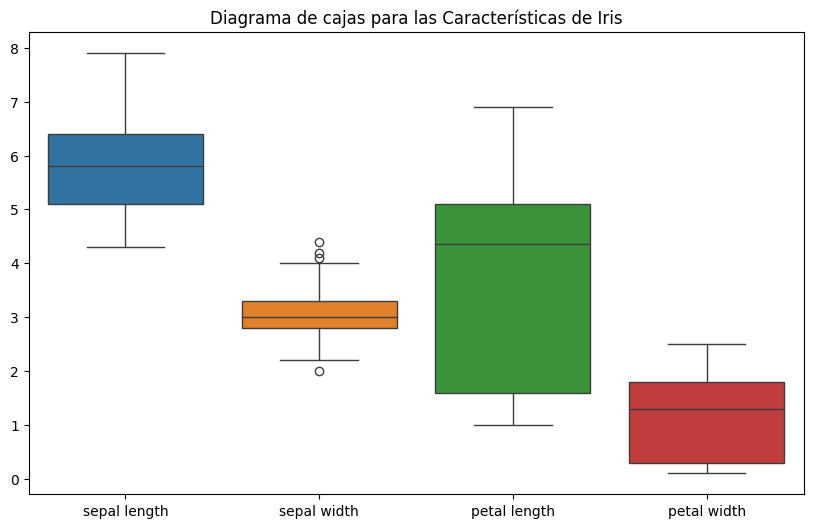

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris)
plt.title('Diagrama de cajas para las Características de Iris')
plt.show()

En el gráfico de cajas y bigotes se observa que por ejemplo la distribución para ancho y largo de sépalo presentan una distribución más homogénea y simétrica si la comparamos con el ancho y largo del pétalo. La variable ancho del sépalo presenta datos atípicos.

<ipython-input-29-0f5883801ae7>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  iris.hist(ax=ax)


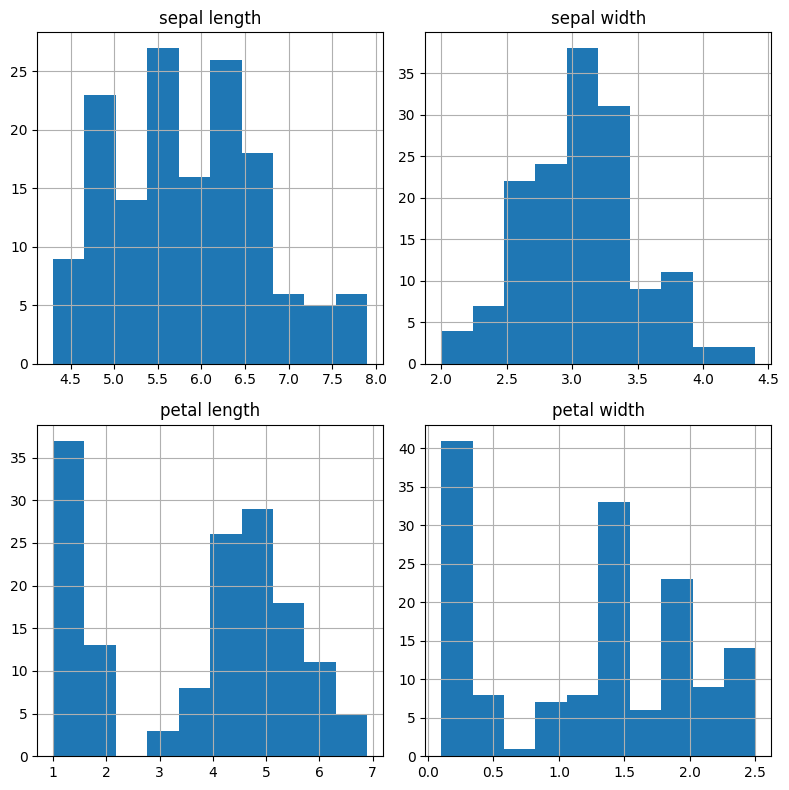

In [29]:
fig, ax = plt.subplots(figsize=(8,8))
iris.hist(ax=ax)
plt.tight_layout()
plt.show()

#Para las variables cuantitavias continuas, se muestra los respectivos histogramas

<ipython-input-30-99e777fef655>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = iris.corr()


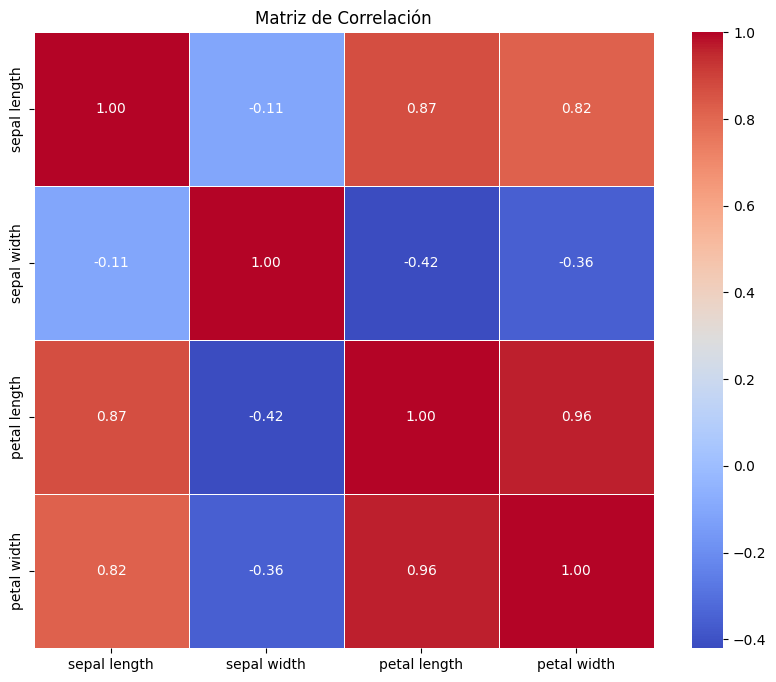

In [30]:
matriz_correlacion = iris.corr()

# Crear un mapa de calor con seaborn para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

En la matriz de correlación para las variables tenemos que existe una relación fuerte y directa entre el ancho de los pétalos la longitud de los mismos. Por otro lado hay una relación débil e inversa entre el ancho del pétalo y el ancho del sépalo. Con este análisis podemos detectar problemas de multicolinelidad que puede generar ruido a la hora de implementar un modelo de predición.

## Etapa 2: Preparación de los datos

De acuerdo con la información inicial presentada en el dataset, realizamos los respectivos cambios de los valores correspondientes a la fila 35 y 38 de la muestra

In [31]:
iris.at[34, 'petal width'] = 0.2  # Cambio en la cuarta característica de la muestra 35
iris.at[37, 'sepal width'] = 3.6  # Cambio en la segunda característica de la muestra 38
iris.at[37, 'petal length'] = 1.4  # Cambio en la tercera característica de la muestra 38

iris1 = iris.copy()

In [32]:
fila1_35 = iris1.iloc[34]
print(fila1_35)

fila1_38 = iris1.iloc[37]
print(fila1_38)

#Se realiza la correción de los datos del dataset de acuerdo a las recomendaciones descritas

sepal length            4.9
sepal width             3.1
petal length            1.5
petal width             0.2
class           Iris-setosa
Name: 34, dtype: object
sepal length            4.9
sepal width             3.6
petal length            1.4
petal width             0.1
class           Iris-setosa
Name: 37, dtype: object


Convertimos los atributos categóricos a escala numérica.

In [33]:
iris1.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
from sklearn.preprocessing import LabelEncoder

# Se convierten los atributos categóricos a valores numéricos
labelencoder= LabelEncoder()
iris1['class'] = labelencoder.fit_transform(iris1['class'])
iris1.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Etapa 3: Modelado
En esta etapa se van a utilizar los datos para realizar aprendizaje del atributo "class" a partir de los valores de los demás atributos.


1.   Dividir el conjunto de datos en conjuntos de entrenamiento y test.
2.   Realizar el entrenamiento de los modelos KNN utilizando para ello el conjunto de entrenamiento.
3.   Aplicar el modelo construido a los datos del conjunto de test.
4.   Cálculo de una métrica de desempeño para evaluar la calidad del modelo en sus prediciones sobre el conjunto de test.

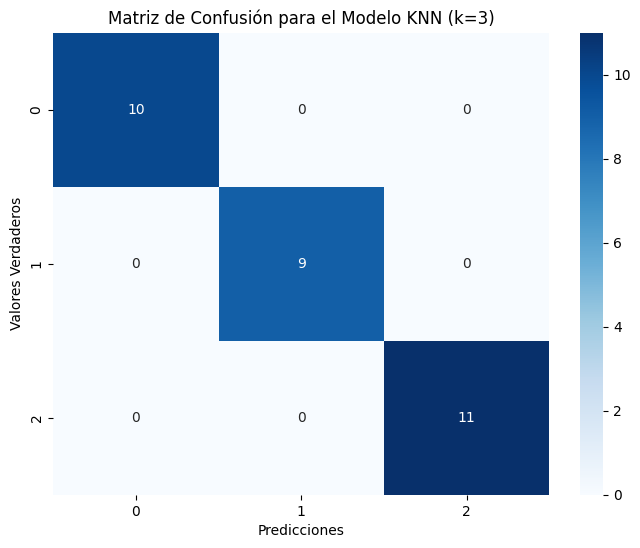


Métricas para el Modelo KNN (k=3):
Precision: 1.000000000000000
Recall: 1.000000000000000
Exactitud: 1.000000000000000
----------------------------------------


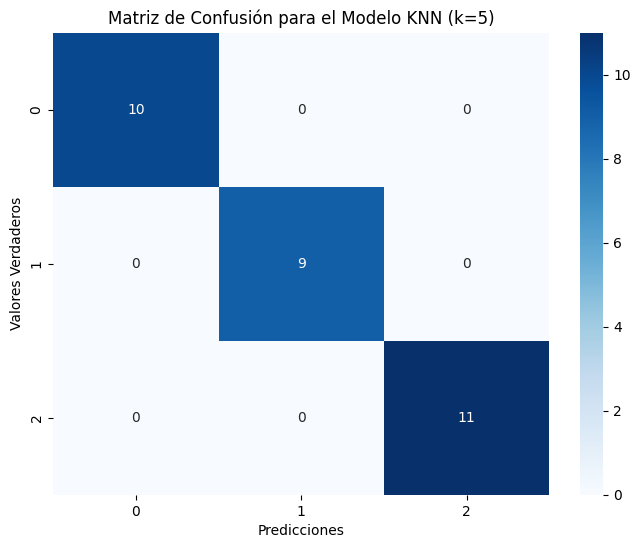


Métricas para el Modelo KNN (k=5):
Precision: 1.000000000000000
Recall: 1.000000000000000
Exactitud: 1.000000000000000
----------------------------------------


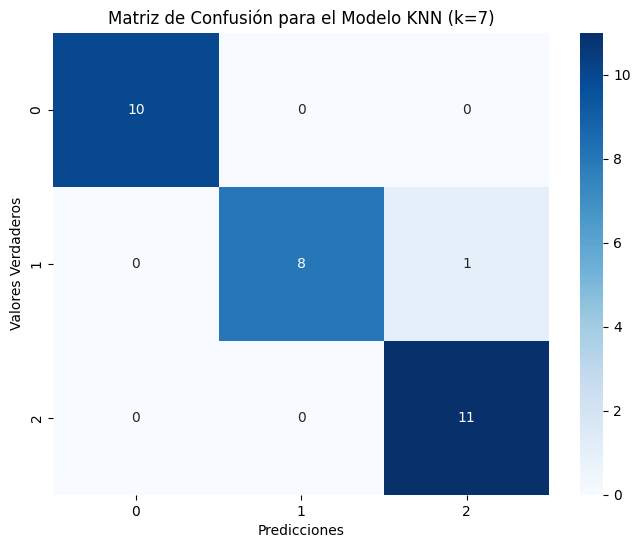


Métricas para el Modelo KNN (k=7):
Precision: 0.969444444444444
Recall: 0.966666666666667
Exactitud: 0.966666666666667
----------------------------------------


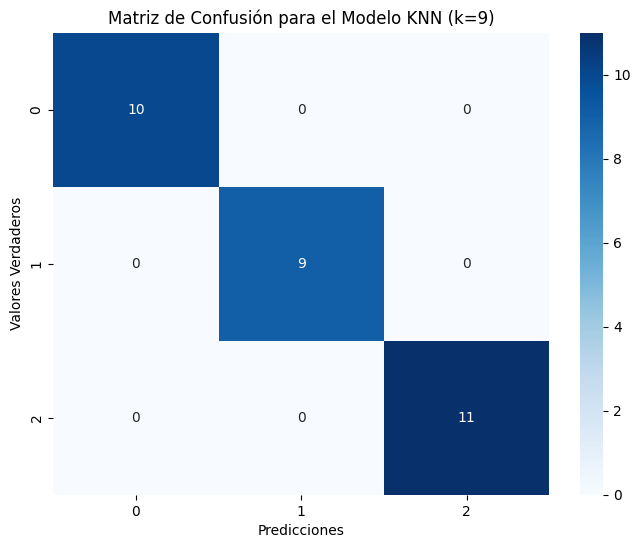


Métricas para el Modelo KNN (k=9):
Precision: 1.000000000000000
Recall: 1.000000000000000
Exactitud: 1.000000000000000
----------------------------------------

Métricas para el Mejor Modelo (k=3):
Precision: 1.000000000000000
Recall: 1.000000000000000
Exactitud: 1.000000000000000


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

#Dividimos el conjunto de datos en conjuntos de entrenamiento y test.


# Tenemos 'X' como los features y 'y' como la variable predictiva
# Asegúrate de haber realizado los cambios en 'iris1' antes de ejecutar este código

X = iris1.drop('class', axis=1)  # Se definen los features
y = iris1['class']  # Definimos el label o varialbe a predecir

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar 4 modelos KNN con diferentes valores de vecinos (k)
k_values = [3, 5, 7, 9]
modelos = [KNeighborsClassifier(n_neighbors=k) for k in k_values]

# Entrenar y evaluar cada modelo
resultados = []
for k, modelo in zip(k_values, modelos):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    resultados.append({'k': k, 'accuracy': accuracy, 'modelo': modelo})

# Encontrar el mejor modelo basado en la precisión

mejor_modelo_info = max(resultados, key=lambda x: x['accuracy'])
mejor_modelo = mejor_modelo_info['modelo']
mejor_k = mejor_modelo_info['k']

# Mostrar matrices de confusión y métricas para cada modelo

for resultado in resultados:
    k_actual = resultado['k']
    modelo_actual = resultado['modelo']

    # Obtener y visualizar la matriz de confusión
    y_pred_actual = modelo_actual.predict(X_test)
    matriz_confusion_actual = confusion_matrix(y_test, y_pred_actual)

    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusion_actual, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión para el Modelo KNN (k={})'.format(k_actual))
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Verdaderos')
    plt.show()

    # Calculamos la precision, recall y exactitud para el modelo actual

    precision_actual = precision_score(y_test, y_pred_actual, average='weighted')
    recall_actual = recall_score(y_test, y_pred_actual, average='weighted')
    exactitud_actual = accuracy_score(y_test, y_pred_actual)

    # Imprimimos las métricas para el modelo con 15 decimales

    print('\nMétricas para el Modelo KNN (k={}):'.format(k_actual))
    print('Precision: {:.15f}'.format(precision_actual))
    print('Recall: {:.15f}'.format(recall_actual))
    print('Exactitud: {:.15f}'.format(exactitud_actual))
    print('-' * 40)

# Imprimir las métricas del mejor modelo con 15 decimalesde precisión

print('\nMétricas para el Mejor Modelo (k={}):'.format(mejor_k))
print('Precision: {:.15f}'.format(precision_score(y_test, mejor_modelo.predict(X_test), average='weighted')))
print('Recall: {:.15f}'.format(recall_score(y_test, mejor_modelo.predict(X_test), average='weighted')))
print('Exactitud: {:.15f}'.format(accuracy_score(y_test, mejor_modelo.predict(X_test))))



Para el mejor modelo se obtienen practicamente un conjunto de métricas perfectas, donde la precisión, el recall y la exactitud son todos 1.0, indica un excelente rendimiento del modelo en el conjunto de datos de prueba.

Precision: Un valor de 1.0 significa que todas las instancias predichas como positivas son verdaderamente positivas, sin falsos positivos. En otras palabas todas las cosas que el modelo dijo que eran positivas, realmente lo eran. No cometió ningún error al decir que algo era positivo.

Recall : Un valor de 1.0 indica que el modelo identificó correctamente todas las instancias positivas y no dejó ninguna sin clasificar. En otras palabras de todas los resultados que eran realmente positivas, el modelo las identificó todas. No se perdió ninguna.

Exactitud:  Un valor de 1.0 significa que todas las predicciones son correctas y no hay errores.

Resumiendo tenemos que el modelo con estas métricas es capaz de clasificar perfectamente todas las instancias en el conjunto de datos de prueba, sin errores de clasificación. En la vida real los rendimientos de este tipo podrían ser sospechosos y podría considerarse la posiblidad de overfitting o realizar validación cruzada para evaluar el modelo.


